# Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline

In [2]:
"""1. Возьмите датасет Mortality and Water Hardness
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные."""
"""Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков"""

'Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?\n\nПостроить точечный график\nРассчитать коэффициенты корреляции Пирсона и Спирмена\nПостроить модель линейной регрессии\nРассчитать коэффициент детерминации\nВывести график остатков'

In [3]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

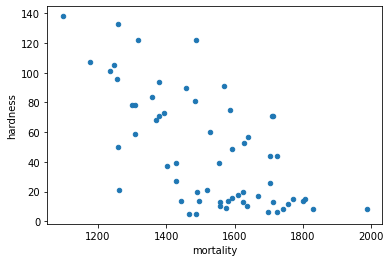

In [4]:
"""Строим точечный график"""
"""Согласно графика, между смертностью в городах и жесткостью воды имеется явная обратная связь"""
df.plot(kind='scatter', x='mortality', y='hardness')

In [5]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
"""Коэффициенты корреляции Пирсона и Спирмена потверждают обратную связь м/у смертностью в городах и жесткостью воды"""
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
df.corr(method='kendall')

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.035548,0.089686
mortality,0.035548,1.000000,-0.453753
hardness,0.089686,-0.453753,1.000000


In [8]:
"""Строим модель линейной регрессии"""
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df[['hardness']] #многомерный массив
y = df['mortality']

In [9]:
# Разбиение датасета на тренировочный и тестовый:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
# Построение и обучение модели:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.coef_

array([-3.13167087])

In [12]:
model.intercept_

1668.9722977277095

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

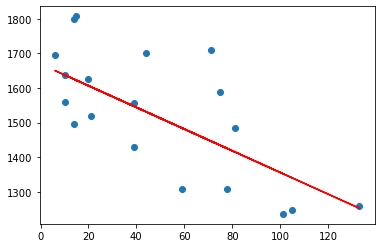

In [14]:
# модель линейной регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [15]:
# значение коэффициента детерминации
model.score(X_test, y_test)

0.5046490611017092

In [16]:
# График остатков
# Вычисляем остатки
residual = (y_test - y_pred)

In [17]:
# Делаю отдельную таблицу с данными y_test,  y_pred,X_test, и остатками -  residual 
df_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'resid': residual})
df_['hardness'] =  X_test
df_

,Actual,Predicted,resid,hardness
0,1247,1340.146856,-93.146856,105
5,1558,1637.655589,-79.655589,10
46,1495,1625.128906,-130.128906,14
31,1702,1531.178779,170.821221,44
13,1307,1424.701970,-117.701970,78
55,1625,1606.338880,18.661120,20
34,1259,1252.460072,6.539928,133
49,1587,1434.096982,152.903018,75
12,1519,1603.207209,-84.207209,21
40,1696,1650.182272,45.817728,6


<AxesSubplot:xlabel='hardness'>

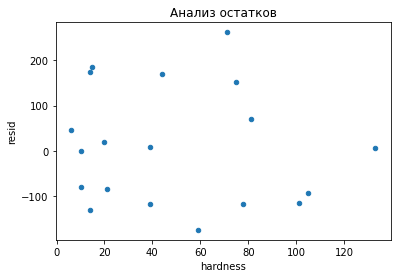

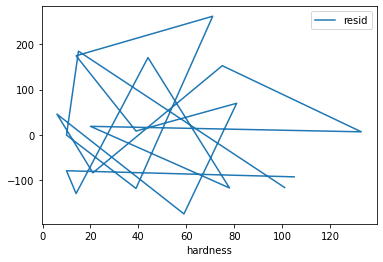

In [18]:
# Визуализирую остатки
# Остатки ведут себя хаотично, какой то системы не прослеживается, соотвественно модель подобрана правильно
# Но я не уверена , что правильно посчитала остатки
df_.plot(kind='scatter', x = 'hardness', y = 'resid', title='Анализ остатков')
df_.plot(kind='line', x = 'hardness', y = 'resid')


# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [19]:
# Строю модель для южных регионов
df_South = df.loc[df['location'].isin(['South'])]
df_South

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

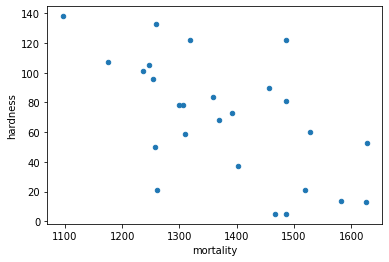

In [20]:
"""Строим точечный график"""
"""Согласно графика, между смертностью в южных городах и жесткостью воды имеется явная обратная связь"""
df_South.plot(kind='scatter', x='mortality', y='hardness')

In [21]:
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [22]:
"""Коэффициенты корреляции Пирсона и Спирмена потверждают обратную связь м/у смертностью в городах и жесткостью воды"""
df_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [23]:
"""Строим модель линейной регрессии"""
X1 = df_South[['hardness']]
y1 = df_South['mortality']

In [24]:
# Разбиение датасета на тренировочный и тестовый:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size= 0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

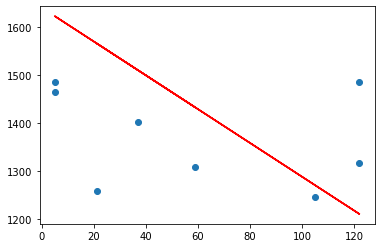

In [26]:
# модель линейной регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [27]:
# значение коэффициента детерминации
model.score(X_test, y_test)

-2.5519223012352077

In [28]:
"""Коэффициент детерминации с минусом, а это значит, что разработанная 
 модель даёт прогноз даже хуже, чем простое усреднение
 Нужно больше данных?
 Может здесь не линейная зависимость?"""

'Коэффициент детерминации с минусом, а это значит, что разработанная \n модель даёт прогноз даже хуже, чем простое усреднение\n Нужно больше данных?\n Может здесь не линейная зависимость?'

<AxesSubplot:title={'center':'Анализ остатков для южных регионов'}, xlabel='hardness', ylabel='resid'>

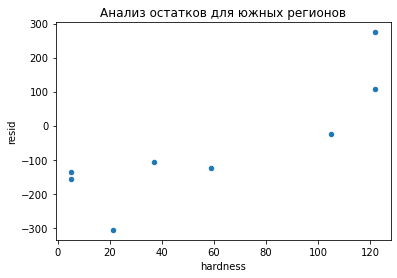

In [29]:
# Вычисляем остатки
residual_1 = (y_test - y_pred)
# Делаю отдельную таблицу с данными y_test,  y_pred,X_test, и остатками -  residual 
df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'resid': residual_1})
df_1['hardness'] =  X_test
df_1.plot(kind='scatter', x = 'hardness', y = 'resid', title='Анализ остатков для южных регионов')
# В графике остатков явно прослеживается кривая, также потверждает что модель выбрана неверно, имеется системная ошибка

In [30]:
# Строю модель для северных регионов
df_North = df.loc[df['location'].isin(['North'])]
df_North

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

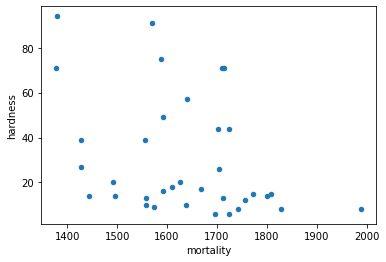

In [31]:
"""Строим точечный график"""
"""Согласно графика, между смертностью в северных городах и жесткостью воды также прослеживается явная обратная связь"""
df_North.plot(kind='scatter', x='mortality', y='hardness')

In [32]:
df_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [33]:
"""Коэффициенты корреляции Пирсона и Спирмена потверждают обратную связь м/у смертностью в городах и жесткостью воды"""
df_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


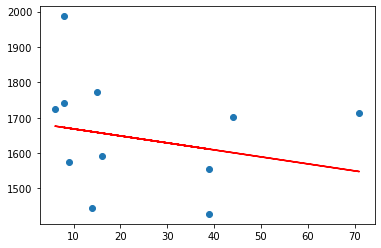

In [34]:
"""Строим модель линейной регрессии"""
X2 = df_North[['hardness']]
y2 = df_North['mortality']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size= 0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
# модель линейной регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [35]:
"""Коэффциент детерминации очень близок к нулю,
это означает низкую значимость модели,т.е. линейная зависимость между ними отсутствует и
прогнозы данной модели лучше не рассматривать. Очевидно, что такая модель будет иметь низкую эффективность."""
model.score(X_test, y_test)

0.018885304285745863

<AxesSubplot:title={'center':'Анализ остатков для северных регионов'}, xlabel='hardness', ylabel='resid'>

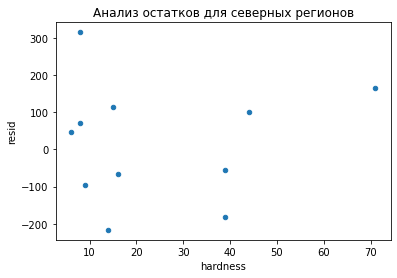

In [36]:
# Вычисляем остатки
residual_2 = (y_test - y_pred)
# Делаю отдельную таблицу с данными y_test,  y_pred,X_test, и остатками -  residual 
df_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'resid': residual_2})
df_2['hardness'] =  X_test
df_2.plot(kind='scatter', x = 'hardness', y = 'resid', title='Анализ остатков для северных регионов')
# остатки ведут себя в принципе хаотично

In [37]:
"""Вывод:
    аналогичная зависимость для северных и южных городов по отдельности не сохраняется.
    Воможно связь м/у жесткостью воды и смертностью не носит линейный характер"""

'Вывод:\n    аналогичная зависимость для северных и южных городов по отдельности не сохраняется.\n    Воможно связь м/у жесткостью воды и смертностью не носит линейный характер'